# Simple Arithmetic project
**This project is aimed at train a machine learning model that performs simple arithmetic.**

## Dataset
**The dataset has four columns:**
 * first_figure -> The first number in the simple arithmetic operation.
 * Operator -> This is the operator used and it is represented as follows;
     1. P = Addition (+)
     2. S = Subtraction (-)
     3. M = Multiplication (*)
     4. D = Division (/)
 * Second_figure -> This is the second number in the simple arithmetic operation. 
 * Result -> This is the result of the simple arithmetic operation.
 
## Evaluation 
**This model is aimed at getting a minimum score(r2_score) of 0.8, and improvement will be implemented.**

## Importing the needed packages and library


In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn

In [2]:
# Importing the datasets
df = pd.read_csv("./data/arithmetic.csv")
df.head()

,first_figure,operator,second_figure,result
0,2,p,2.0,4.0
1,5,s,3.0,2.0
2,4,m,2.0,8.0
3,3,m,6.0,18.0
4,5,s,6.0,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   first_figure   199 non-null    int64  
 1   operator       199 non-null    object 
 2   second_figure  199 non-null    float64
 3   result         199 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 6.3+ KB


In [4]:
df["first_figure"] = df["first_figure"].astype("float64")

In [5]:
df["result"] = df["result"].astype("float64")

In [6]:
df.head()

,first_figure,operator,second_figure,result
0,2.0,p,2.0,4.0
1,5.0,s,3.0,2.0
2,4.0,m,2.0,8.0
3,3.0,m,6.0,18.0
4,5.0,s,6.0,1.0


In [7]:
df.shape

(199, 4)

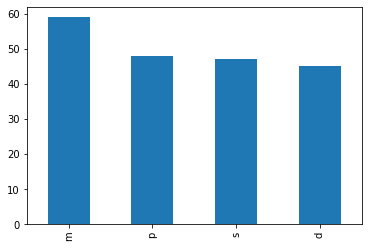

In [9]:
# Checking the distribution of various operators in the datasets
df["operator"].value_counts().plot.bar()

In [12]:
# This will get the column with strings dtype(Operator) and will convert it to categorical variables.

for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()
        # This will add one to each categorical value(code) given to each categories. And change the column(Operator) to the codes
        df[label] = pd.Categorical(content).codes + 1

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   first_figure   199 non-null    float64
 1   operator       199 non-null    int8   
 2   second_figure  199 non-null    float64
 3   result         199 non-null    float64
dtypes: float64(3), int8(1)
memory usage: 5.0 KB


In [19]:
df.head()

,first_figure,operator,second_figure,result
0,2.0,3,2.0,4.0
1,5.0,4,3.0,2.0
2,4.0,2,2.0,8.0
3,3.0,2,6.0,18.0
4,5.0,4,6.0,1.0


In [20]:
df.operator.unique()

array([3, 4, 2, 1], dtype=int8)

## Modeling

In [13]:
# RandomForestRegressor is imported and instantiated, dataset is splited to train and test splits

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
np.random.seed(42)
X = df.drop("result", axis =1)
y = df.result

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                   y,
                                                   test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [14]:
#Make predictions with the instantiated model
y_preds = model.predict(X_test)

In [15]:
y_preds.shape

(40,)

In [16]:
y_test.shape

(40,)

In [19]:
# Evaluating the model on the training sets 
model.score(X_train, y_train)

0.968116319646442

In [20]:
# Evaluating the model on the test size
model.score(X_test, y_test)

0.8195842556936186

In [21]:
y_preds.dtype

dtype('float64')

In [22]:
# Importing the mean_absolute_error to evaluate the model
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_preds)
mae

9.317327777777777

In [23]:
from sklearn.metrics import r2_score, mean_squared_error
y_test_mean = np.full(len(y_test), y_test.mean())
r2_score(y_test, y_preds)

0.8195842556936186

In [24]:
r2_score(y_test, y_test)

1.0

In [26]:
#Importing and instantiating the Ridge model 
from sklearn.linear_model import Ridge
np.random.seed(42)

ridge = Ridge()
ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

0.24753804579192676

In [27]:
y_preds2 = ridge.predict(X_test)

In [28]:
r2_score(y_test, y_preds2)

0.24753804579192673

In [29]:
maeR = mean_absolute_error(y_test, y_preds2)
maeR

26.133193530438167

In [30]:
model.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)>

## Hyperparameters tunning using GridSearchCV

In [46]:
from sklearn.model_selection import GridSearchCV

grid = {
    "n_estimators": [10, 100, 1000],
    "min_samples_leaf": [2, 4],
    "n_jobs": [None, -1],
    "max_features": ["auto"]
}

gs_model = GridSearchCV(model, grid, verbose=2, cv = 5)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_features=auto, min_samples_leaf=2, n_estimators=10, n_jobs=None 
[CV]  max_features=auto, min_samples_leaf=2, n_estimators=10, n_jobs=None, total=   0.0s
[CV] max_features=auto, min_samples_leaf=2, n_estimators=10, n_jobs=None 
[CV]  max_features=auto, min_samples_leaf=2, n_estimators=10, n_jobs=None, total=   0.0s
[CV] max_features=auto, min_samples_leaf=2, n_estimators=10, n_jobs=None 
[CV]  max_features=auto, min_samples_leaf=2, n_estimators=10, n_jobs=None, total=   0.0s
[CV] max_features=auto, min_samples_leaf=2, n_estimators=10, n_jobs=None 
[CV]  max_features=auto, min_samples_leaf=2, n_estimators=10, n_jobs=None, total=   0.0s
[CV] max_features=auto, min_samples_leaf=2, n_estimators=10, n_jobs=None 
[CV]  max_features=auto, min_samples_leaf=2, n_estimators=10, n_jobs=None, total=   0.0s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] max_features=auto, min_samples_leaf=2, n_estimators=10, n_jobs=-1 
[CV]  max_features=auto, min_samples_leaf=2, n_estimators=10, n_jobs=-1, total=   2.5s
[CV] max_features=auto, min_samples_leaf=2, n_estimators=10, n_jobs=-1 
[CV]  max_features=auto, min_samples_leaf=2, n_estimators=10, n_jobs=-1, total=   0.2s
[CV] max_features=auto, min_samples_leaf=2, n_estimators=10, n_jobs=-1 
[CV]  max_features=auto, min_samples_leaf=2, n_estimators=10, n_jobs=-1, total=   0.2s
[CV] max_features=auto, min_samples_leaf=2, n_estimators=10, n_jobs=-1 
[CV]  max_features=auto, min_samples_leaf=2, n_estimators=10, n_jobs=-1, total=   0.2s
[CV] max_features=auto, min_samples_leaf=2, n_estimators=10, n_jobs=-1 
[CV]  max_features=auto, min_samples_leaf=2, n_estimators=10, n_jobs=-1, total=   0.2s
[CV] max_features=auto, min_samples_leaf=2, n_estimators=100, n_jobs=None 
[CV]  max_features=auto, min_samples_leaf=2, n_estimators=100, n_jobs=None, total=   0.4s
[CV] max_features=auto, min_samples_lea

[CV]  max_features=auto, min_samples_leaf=4, n_estimators=1000, n_jobs=-1, total=   3.2s
[CV] max_features=auto, min_samples_leaf=4, n_estimators=1000, n_jobs=-1 
[CV]  max_features=auto, min_samples_leaf=4, n_estimators=1000, n_jobs=-1, total=   3.1s
[CV] max_features=auto, min_samples_leaf=4, n_estimators=1000, n_jobs=-1 
[CV]  max_features=auto, min_samples_leaf=4, n_estimators=1000, n_jobs=-1, total=   2.6s
[CV] max_features=auto, min_samples_leaf=4, n_estimators=1000, n_jobs=-1 
[CV]  max_features=auto, min_samples_leaf=4, n_estimators=1000, n_jobs=-1, total=   2.5s
[CV] max_features=auto, min_samples_leaf=4, n_estimators=1000, n_jobs=-1 
[CV]  max_features=auto, min_samples_leaf=4, n_estimators=1000, n_jobs=-1, total=   2.3s


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  1.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [47]:
gs_model.score(X_test, y_test)

0.8323430701532268

In [48]:
model.score(X_test, y_test)

0.8195842556936186

In [49]:
gs_preds = gs_model.predict(X_test)


In [50]:
r2_score(y_test, gs_preds)

0.8323430701532268

In [52]:
gs_mae = mean_absolute_error(y_test, gs_preds)
gs_mae

8.80124176587302

In [53]:
gs_model.best_params_

{'max_features': 'auto',
 'min_samples_leaf': 2,
 'n_estimators': 100,
 'n_jobs': None}

In [54]:
grid2 = {
    "max_depth": [None, 5],
    "min_samples_leaf": [1, 2, 3],
    "max_features": ["auto", "sqrt", "log2"]
}

gs2_model = GridSearchCV(model, grid2, verbose =2, cv=5)
gs2_model.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1 ...........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, total=   0.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1 ...........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1 ...........
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1 ...........
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1 ...........
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2 ...........
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2 ...........
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2 ...........
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, total=   0.3s
[CV] max_depth=None, max_features=auto, min_sampl

[CV]  max_depth=5, max_features=auto, min_samples_leaf=3, total=   0.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=3 ..............
[CV]  max_depth=5, max_features=auto, min_samples_leaf=3, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1 ..............
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1 ..............
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1 ..............
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1 ..............
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1 ..............
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2 ..............

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   25.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [55]:
gs2_model.score(X_train, y_train)

0.9603885635231668

In [56]:
gs2_model.score(X_test, y_test)

0.7901234088150221

In [57]:
gs2_model.best_params_

{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1}

In [58]:
grid3 = {
    "n_estimators": [10, 100, 1000],
    "min_samples_leaf": [1, 2, 4],
    "n_jobs": [None, -1],
    "max_features": ["auto", "sqrt"],
    "max_depth": [None, 5]
}

gs3_model = GridSearchCV(model, grid3, verbose=2, cv=5)
gs3_model.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=10, n_jobs=None 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=10, n_jobs=None, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=10, n_jobs=None 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=10, n_jobs=None, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=10, n_jobs=None 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=10, n_jobs=None, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=10, n_jobs=None 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=10, n_jobs=None, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=10, n_jobs=None 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, n_estim

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=10, n_jobs=-1, total=   2.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=10, n_jobs=-1 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=10, n_jobs=-1, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=10, n_jobs=-1 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=10, n_jobs=-1, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=10, n_jobs=-1 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=10, n_jobs=-1, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=10, n_jobs=-1 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=10, n_jobs=-1, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=100, n_jobs=None 
[CV]  max_depth=None, max_features=auto, m

[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=100, n_jobs=-1, total=   0.5s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=100, n_jobs=-1 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=100, n_jobs=-1, total=   0.5s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=1000, n_jobs=None 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=1000, n_jobs=None, total=   2.6s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=1000, n_jobs=None 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=1000, n_jobs=None, total=   2.6s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=1000, n_jobs=None 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=1000, n_jobs=None, total=   2.7s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=1000, n_jobs=None 
[CV]  max_dept

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=10, n_jobs=None, total=   0.0s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=10, n_jobs=-1 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=10, n_jobs=-1, total=   0.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=10, n_jobs=-1 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=10, n_jobs=-1, total=   0.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=10, n_jobs=-1 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=10, n_jobs=-1, total=   0.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=10, n_jobs=-1 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=10, n_jobs=-1, total=   0.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=10, n_jobs=-1 
[CV]  max_depth=None, max_features=sqrt, mi

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=100, n_jobs=-1, total=   0.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=100, n_jobs=-1 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=100, n_jobs=-1, total=   0.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=100, n_jobs=-1 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=100, n_jobs=-1, total=   0.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=1000, n_jobs=None 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=1000, n_jobs=None, total=   2.6s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=1000, n_jobs=None 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=1000, n_jobs=None, total=   2.7s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=1000, n_jobs=None 
[CV]  max_depth=None

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=1000, n_jobs=-1, total=   2.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=10, n_jobs=None 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=10, n_jobs=None, total=   0.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=10, n_jobs=None 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=10, n_jobs=None, total=   0.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=10, n_jobs=None 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=10, n_jobs=None, total=   0.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=10, n_jobs=None 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=10, n_jobs=None, total=   0.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=10, n_jobs=None 
[CV]  max_depth=5, max_features=auto, min_samples_le

[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=100, n_jobs=None, total=   0.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=100, n_jobs=None 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=100, n_jobs=None, total=   0.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=100, n_jobs=-1 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=100, n_jobs=-1, total=   0.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=100, n_jobs=-1 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=100, n_jobs=-1, total=   0.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=100, n_jobs=-1 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=100, n_jobs=-1, total=   0.6s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=100, n_jobs=-1 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, n

[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=1000, n_jobs=-1, total=   2.7s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=1000, n_jobs=-1 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=1000, n_jobs=-1, total=   2.7s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=1000, n_jobs=-1 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=1000, n_jobs=-1, total=   2.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=10, n_jobs=None 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=10, n_jobs=None, total=   0.0s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=10, n_jobs=None 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=10, n_jobs=None, total=   0.0s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=10, n_jobs=None 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=100, n_jobs=None, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=100, n_jobs=None 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=100, n_jobs=None, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=100, n_jobs=None 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=100, n_jobs=None, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=100, n_jobs=None 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=100, n_jobs=None, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=100, n_jobs=-1 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=100, n_jobs=-1, total=   0.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=100, n_jobs=-1 
[CV]  max_depth=5, max_features=sqrt, min_samples_l

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=1000, n_jobs=-1, total=   2.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=1000, n_jobs=-1 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=1000, n_jobs=-1, total=   2.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=1000, n_jobs=-1 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=1000, n_jobs=-1, total=   2.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=1000, n_jobs=-1 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=1000, n_jobs=-1, total=   2.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=1000, n_jobs=-1 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=1000, n_jobs=-1, total=   2.6s


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  6.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [59]:
gs3_model.score(X_train, y_train)

0.9538373494080568

In [60]:
gs3_model.score(X_test, y_test)

0.712471271534492

Hitherto the gs_model has the best performance with:
    r2_score = 0.8
    mean_absolute_error = 8.8